In [1]:
# matplotlib is a commonly used package for plotting
import matplotlib.pyplot as plt
# pandas is a package used for making the handling of large data sets easier 
import pandas as pd
# numpy is very common package for handling arrays and matrices
import numpy as np
from scipy.spatial.distance import squareform, pdist, euclidean

import datetime

# this line tells matplotlib to plot results inline with the current jupyter notebook
%matplotlib inline

from random import seed
from random import choice
from random import shuffle

from sklearn.preprocessing import StandardScaler

import seaborn as sns; 
sns.set()

import os #chdir, getcwd(), walk

#For Kmean clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from random import uniform
from math import cos, sin, pi
from numpy import outer, arange
from pylab import *

from math import log, exp

from sympy.combinatorics.graycode import gray_to_bin

from time import gmtime, strftime
#Set the working directory

import struct as st

In [2]:
print(datetime.datetime.now())
t1 = datetime.datetime.now()

2019-07-05 16:48:28.139127


In [3]:
def performPCAAnalysis(dataForProcessing, numberofPCs):
        pca = PCA(n_components=numberofPCs)
        pcaReducedData = pca.fit_transform(dataForProcessing)
        plt.plot(pca.explained_variance_ratio_)
        plt.xlabel('PCA #')
        plt.ylabel('Explained variance')
        plt.savefig("PCAAnalysis.png", frameon = True)
        plt.show()
        
        return pcaReducedData
    
def calculateScoreForKMeanClustering(pcaReducedData, maxNoOfClusters):
    
        Nc = range(1, maxNoOfClusters)
        kmeans = [KMeans(n_clusters=i) for i in Nc]
        score = [kmeans[i].fit(pcaReducedData).score(pcaReducedData) for i in range(len(kmeans))]
        plt.plot(Nc,score)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Score')
        plt.title("ClusteringScore")
        plt.savefig("ClusteringScore.png")
        plt.show()
        
        return

def performtSNEAnalysis(pcaReducedData,noOfClusters):

            X_embedded = TSNE(n_components=2, n_iter=1000, verbose=3).fit_transform(pcaReducedData)

            kmeans = KMeans(n_clusters=noOfClusters, random_state=0).fit(pcaReducedData)
            plt.scatter(X_embedded[:,0],X_embedded[:,1],c = kmeans.labels_, cmap='gist_rainbow', alpha=0.3)
            plt.colorbar()
            plt.savefig('LabelledtSNE.png')
            plt.show()
            
            return X_embedded

In [14]:
os.chdir('//labdata2.ad.mshri.on.ca/wrana_lab/skumar/Computational/COMP10_AsadPaper/CellularHeterogeneity/')
fileName = 'GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.csv'
data_raw = pd.read_csv(fileName, index_col=0)
data_raw = data_raw.transpose()
#data_raw = data_raw.drop(labels=data_raw.columns[0], axis=1)
data_raw.head(10)

gene_name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,RP11-309M23.1,AMDP1,BX649553.1,BX649553.2,BX649553.3,BX649553.4,RN7SL355P,MIR3690,AL732314.1,AJ271736.10
BC01_02,0.00,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_03,0.00,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_04,0.00,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_05,0.00,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_06,0.00,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_08,19.38,0.0,140.00,37.75,0.00,0.0,0.00,31.10,57.71,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_10,0.00,0.0,38.06,117.92,0.67,0.0,0.00,87.85,19.47,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_11,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_12,0.00,0.0,10.77,0.00,0.00,0.0,0.00,30.21,4.82,80.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BC01_24,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


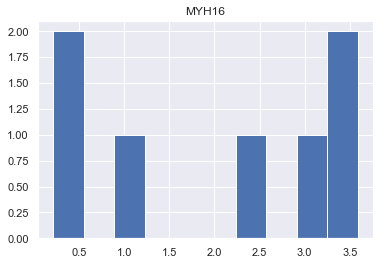

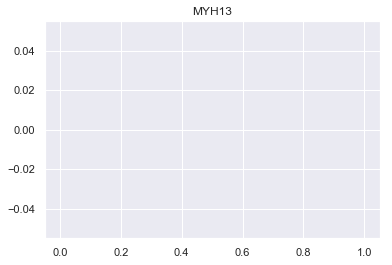

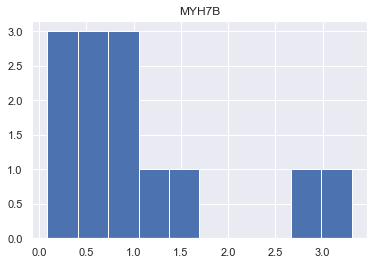

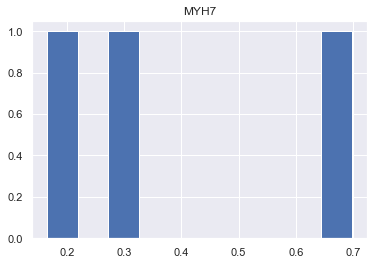

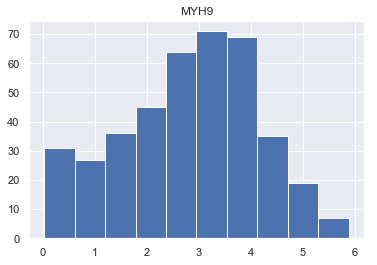

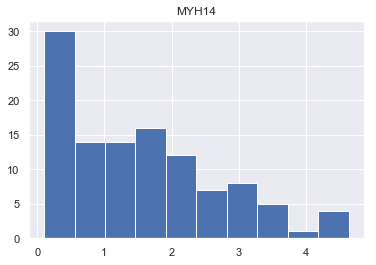

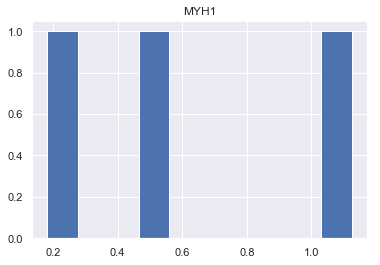

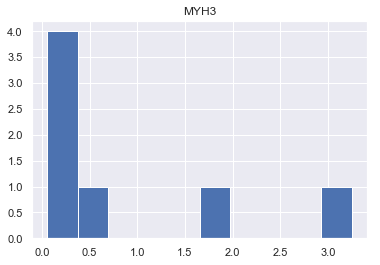

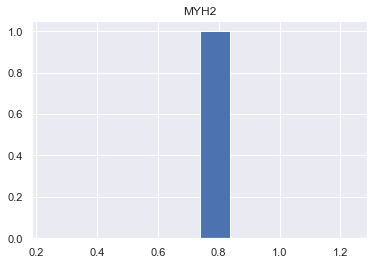

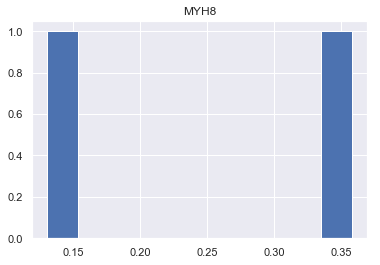

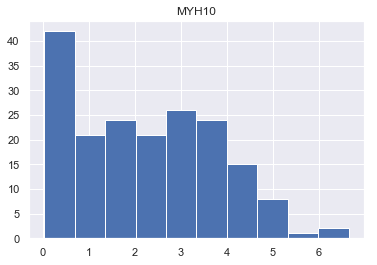

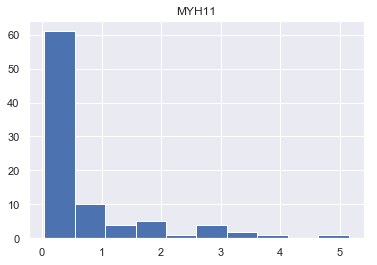

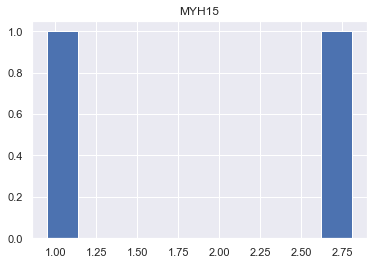

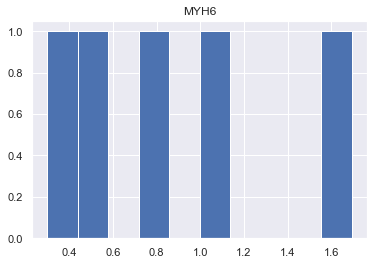

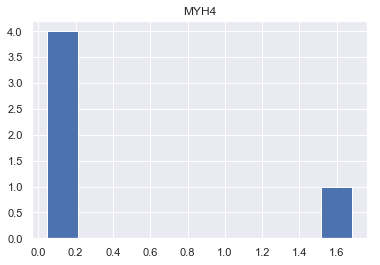

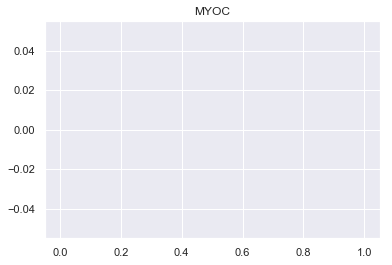

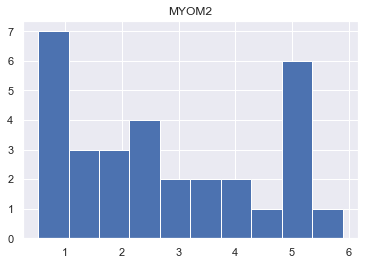

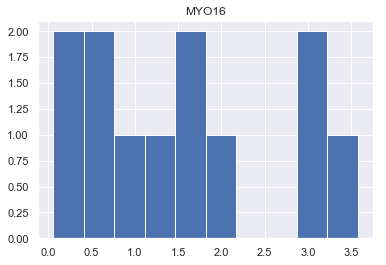

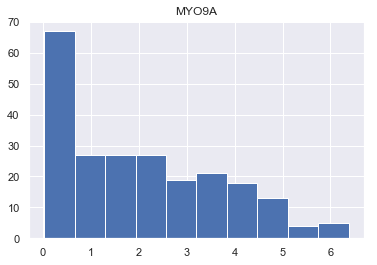

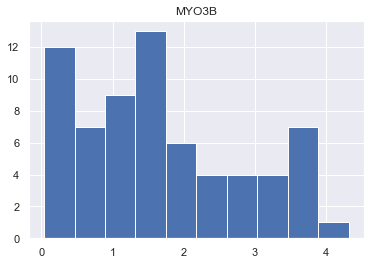

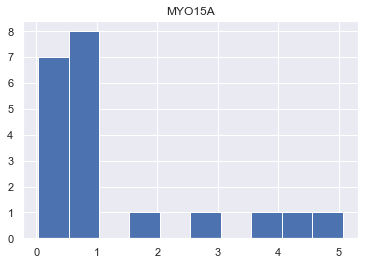

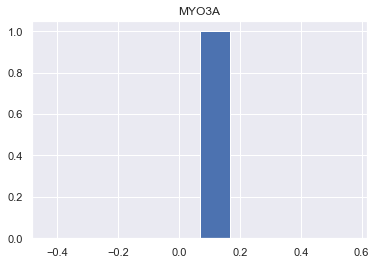

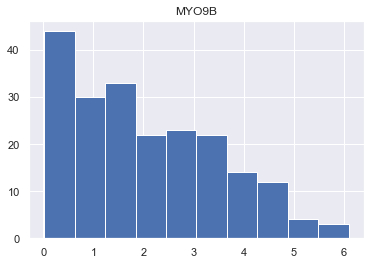

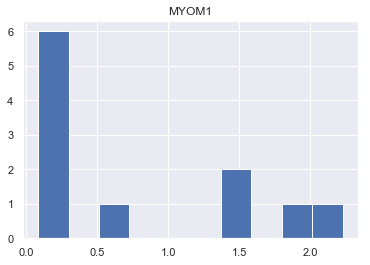

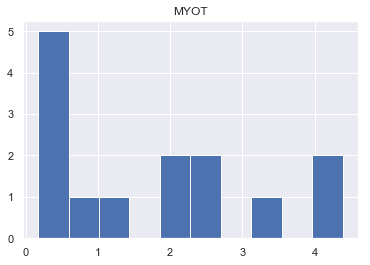

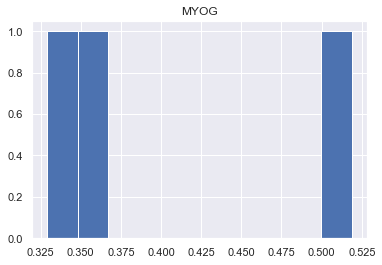

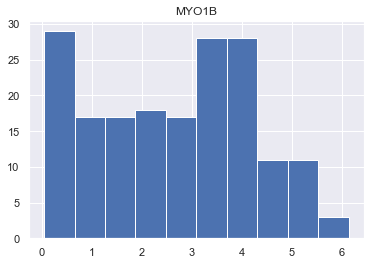

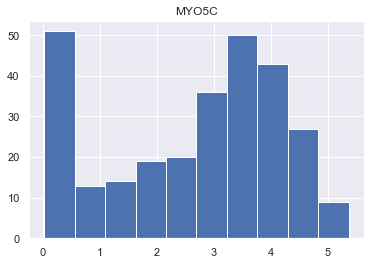

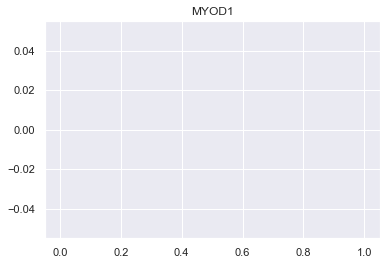

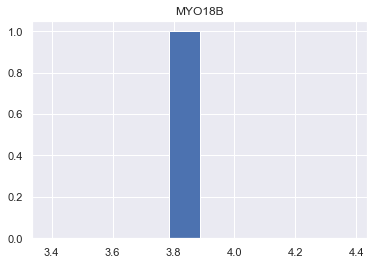

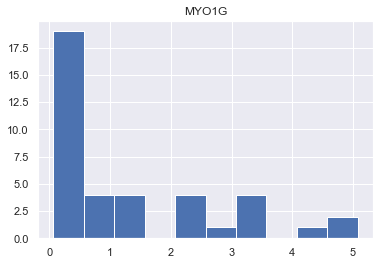

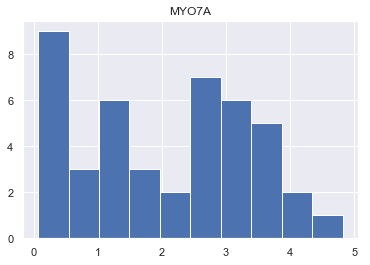

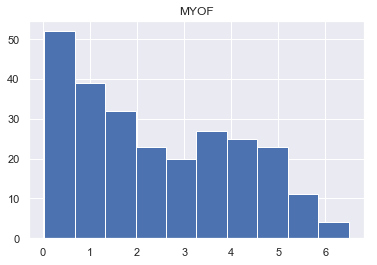

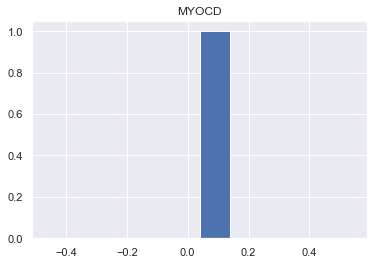

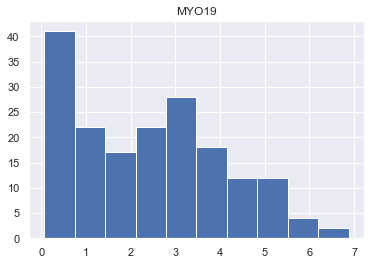

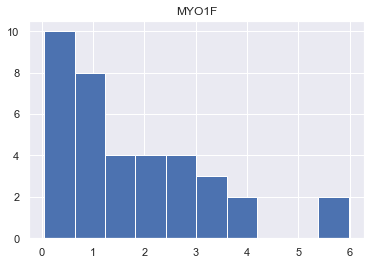

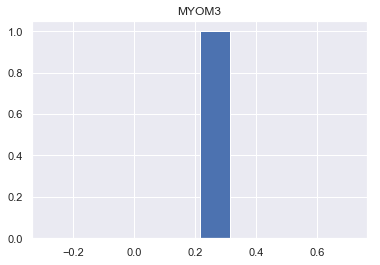

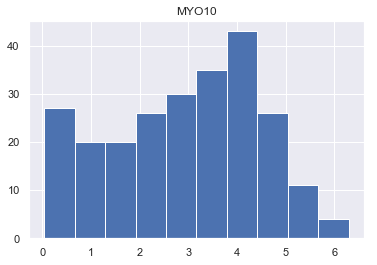

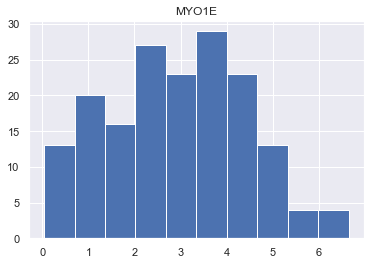

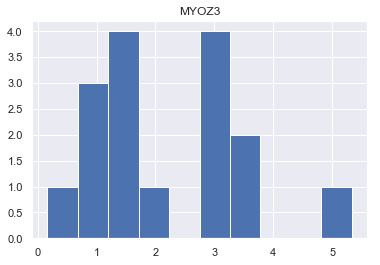

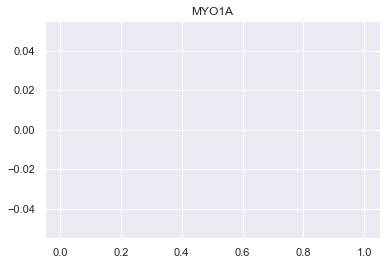

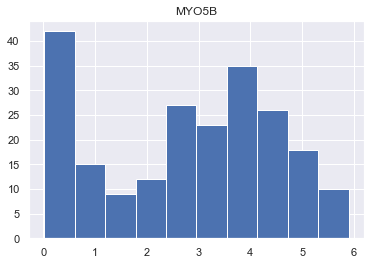

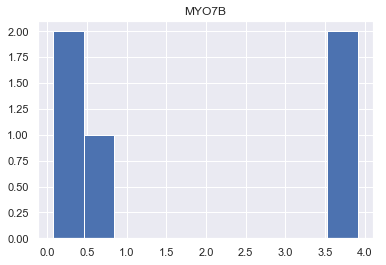

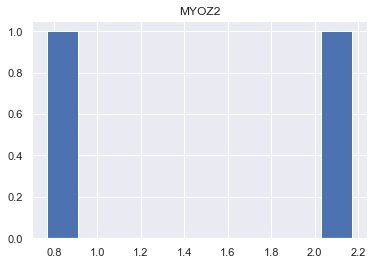

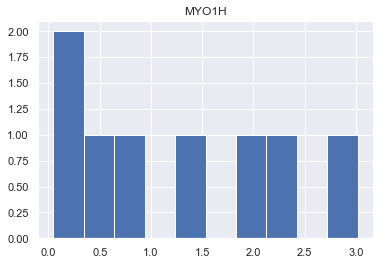

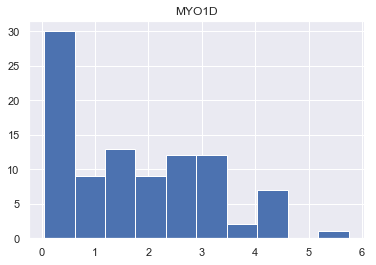

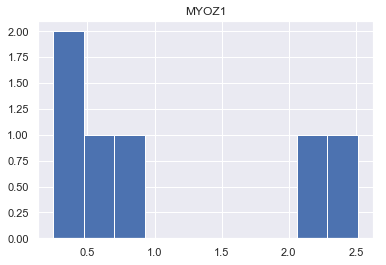

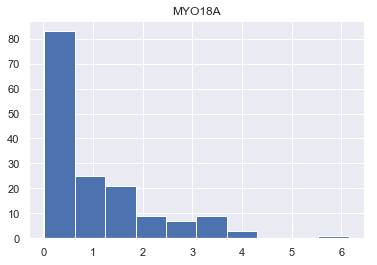

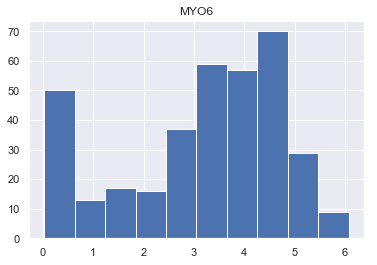

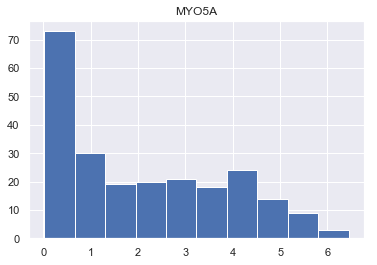

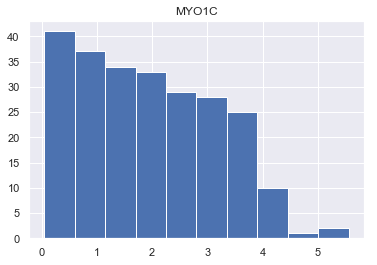

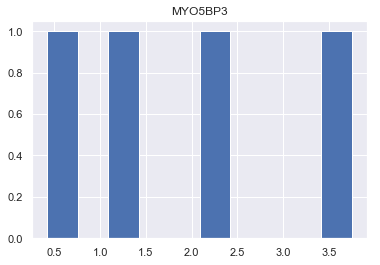

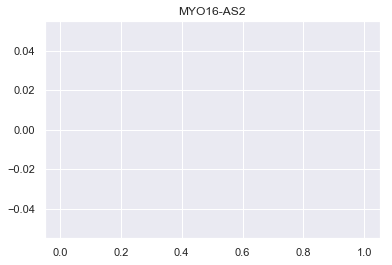

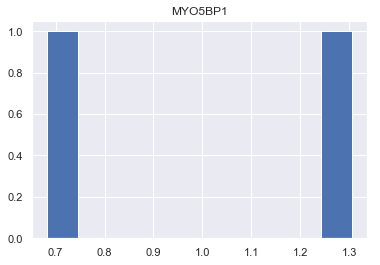

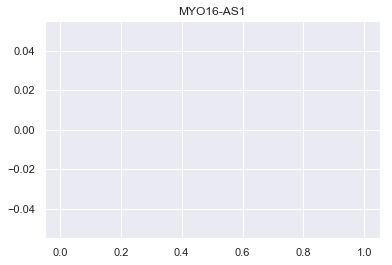

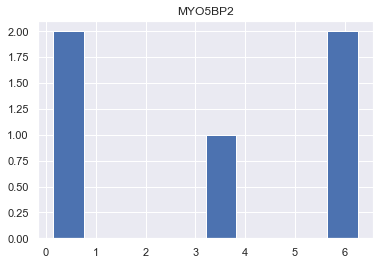

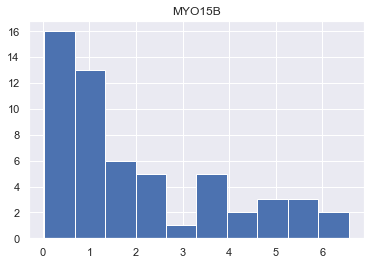

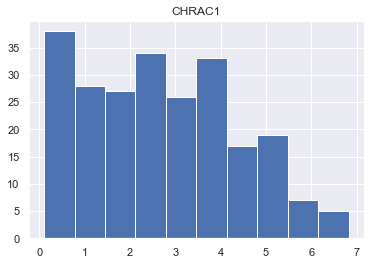

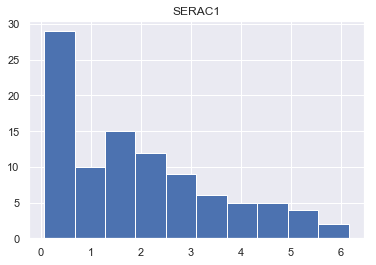

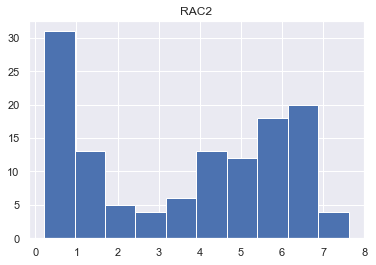

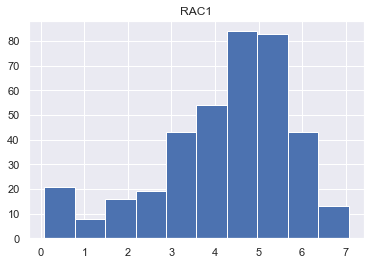

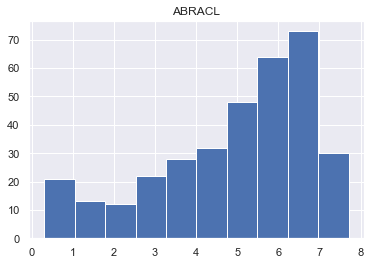

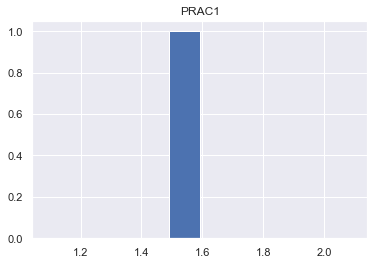

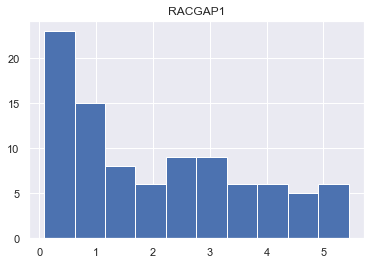

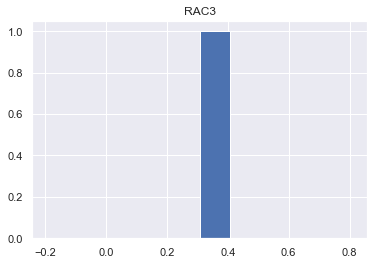

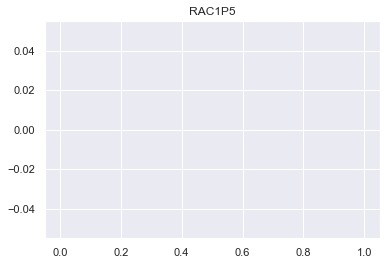

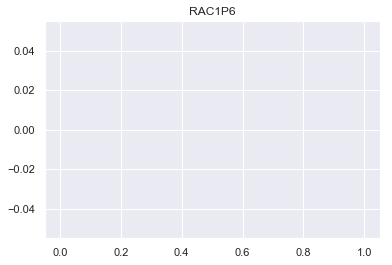

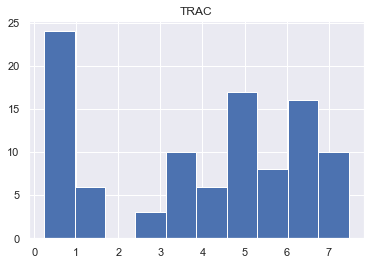

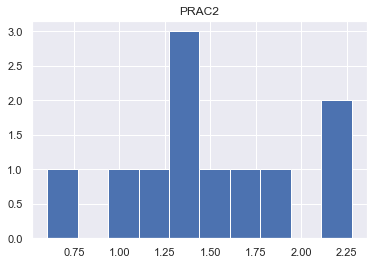

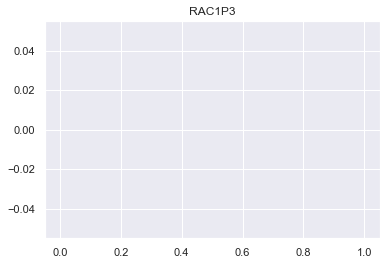

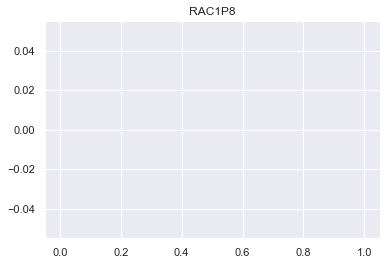

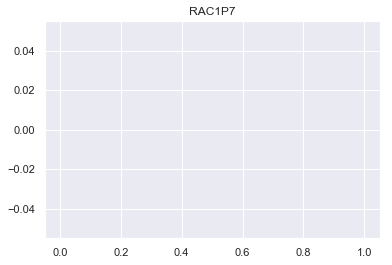

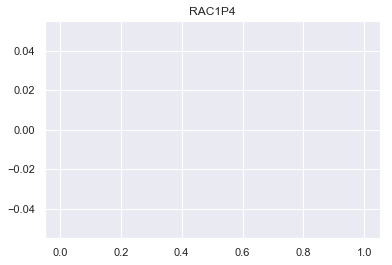

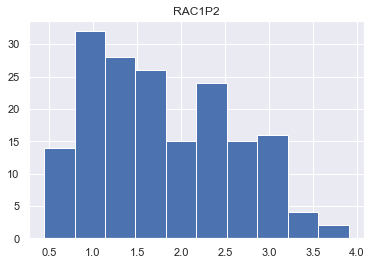

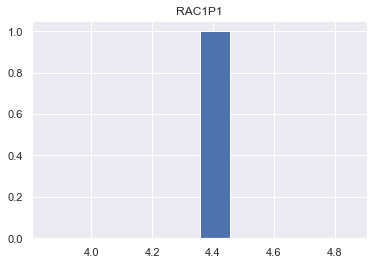

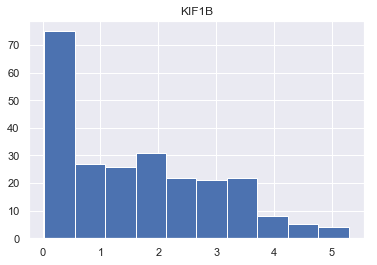

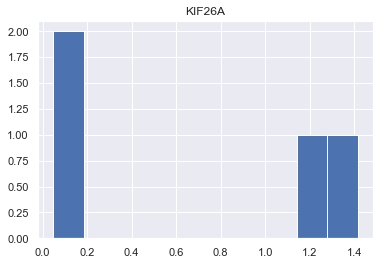

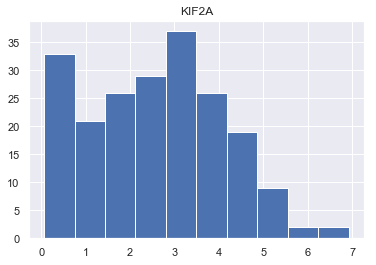

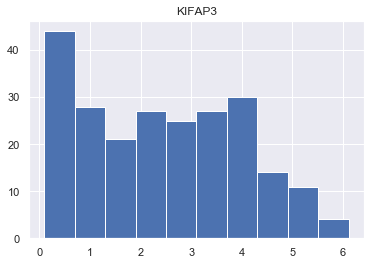

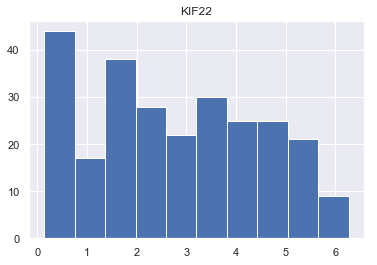

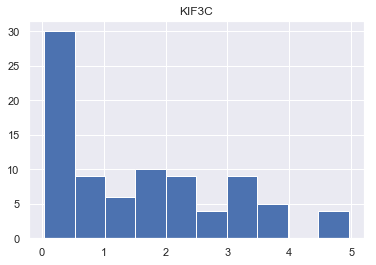

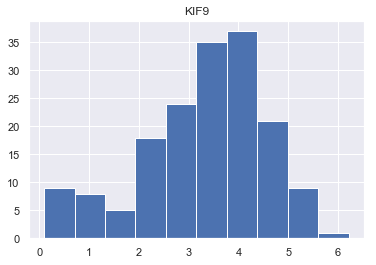

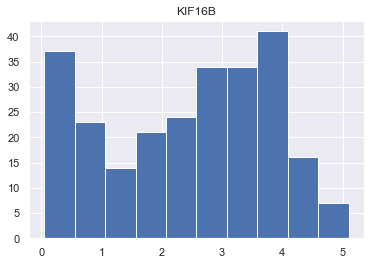

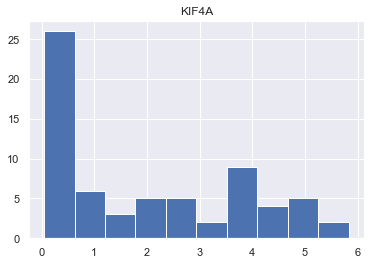

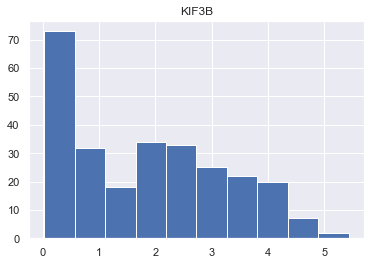

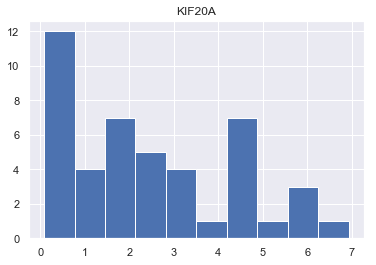

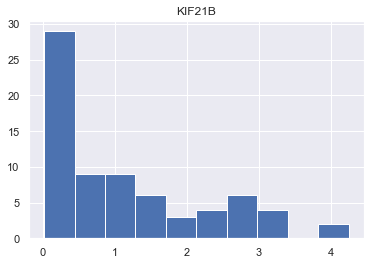

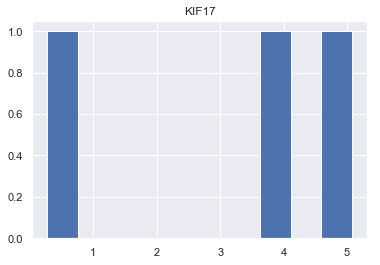

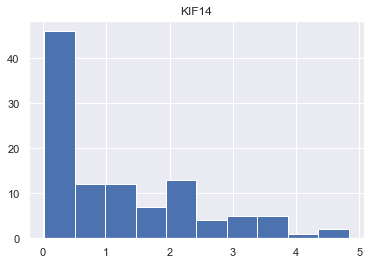

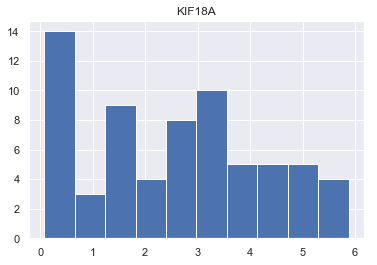

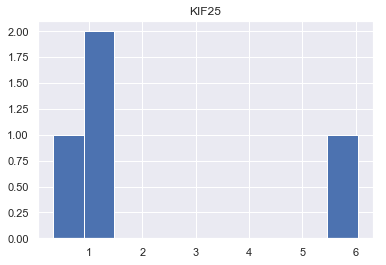

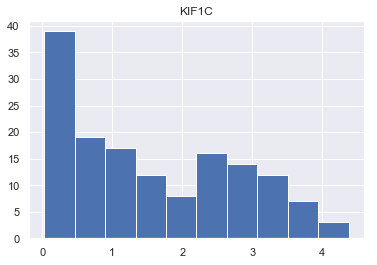

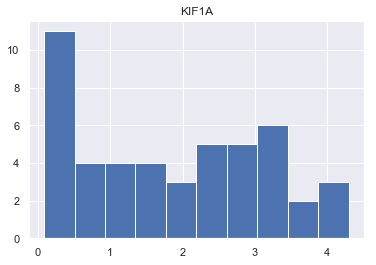

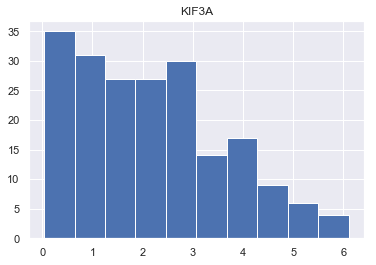

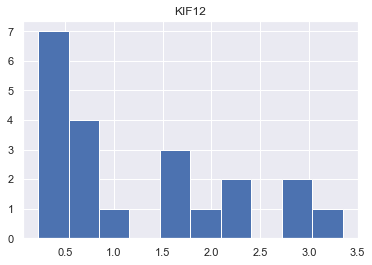

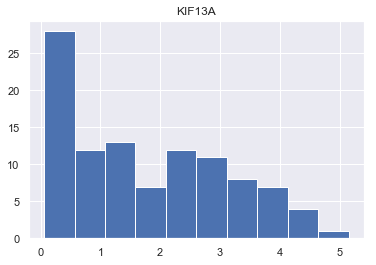

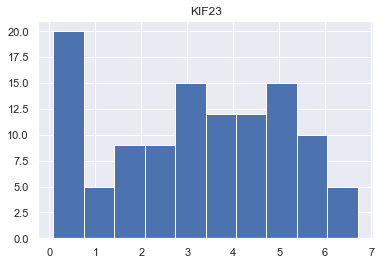

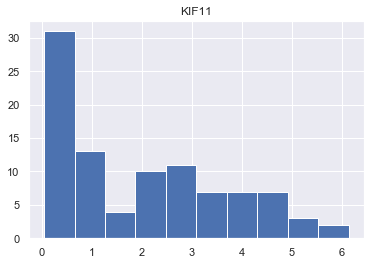

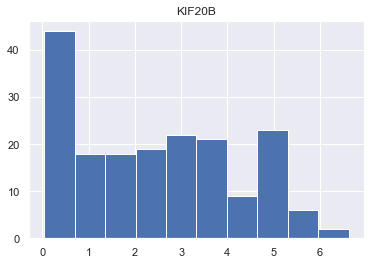

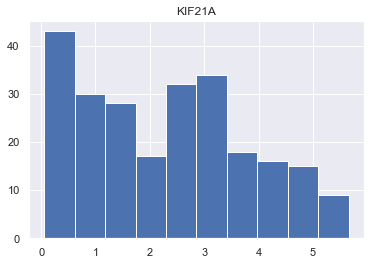

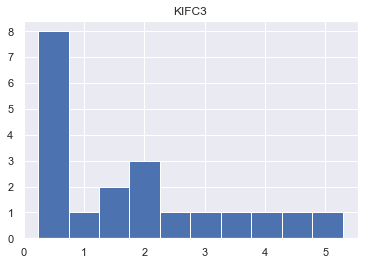

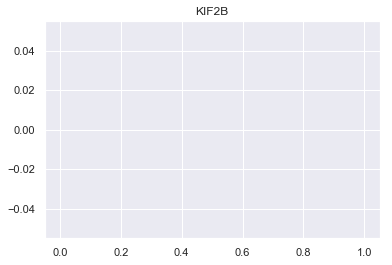

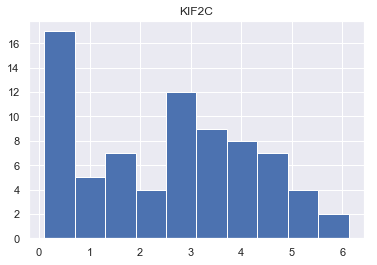

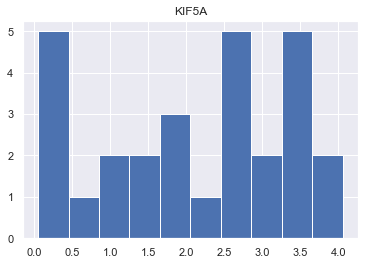

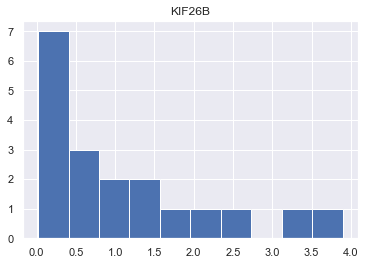

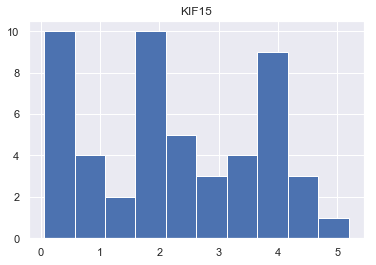

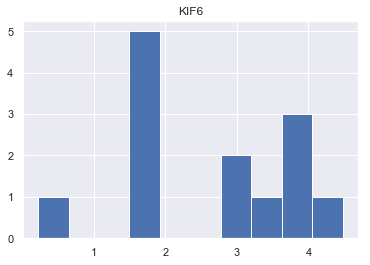

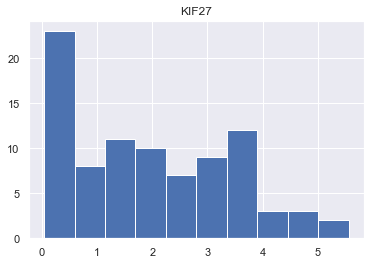

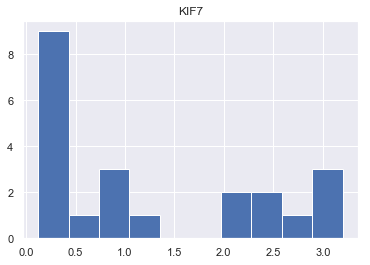

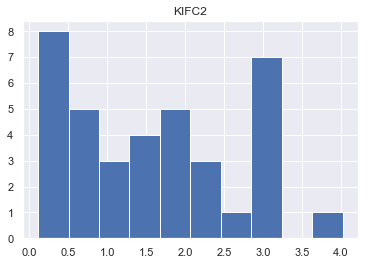

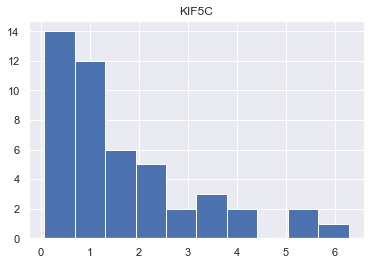

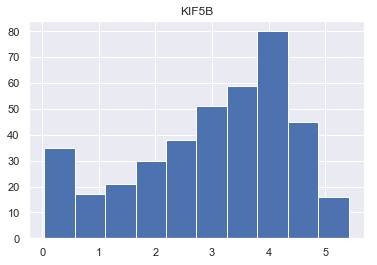

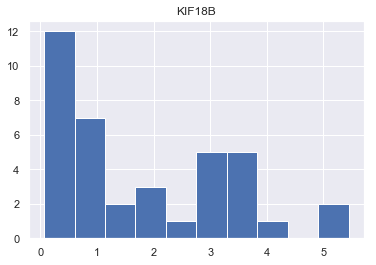

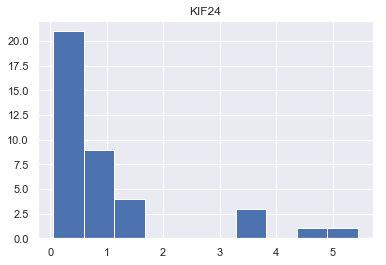

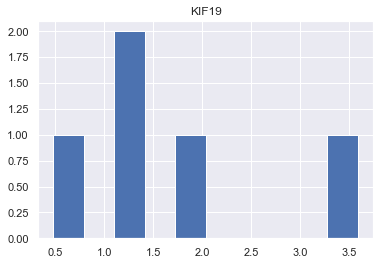

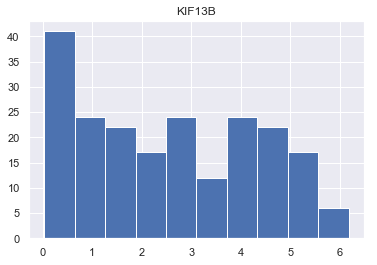

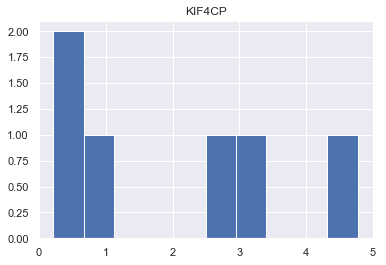

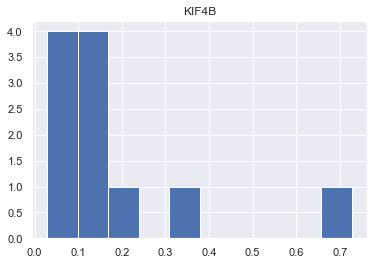

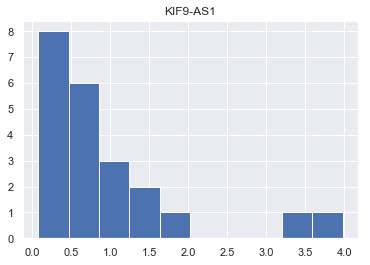

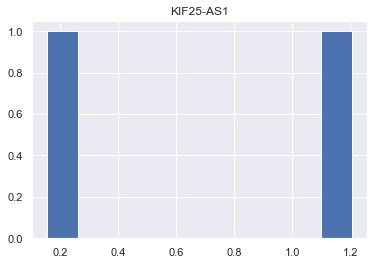

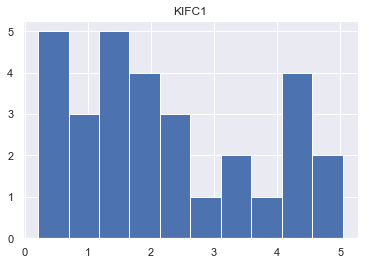

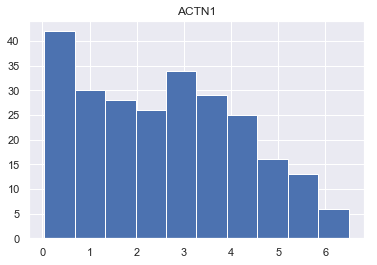

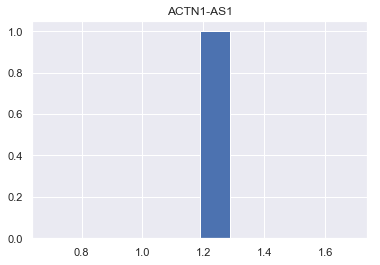

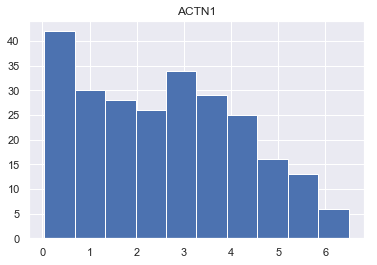

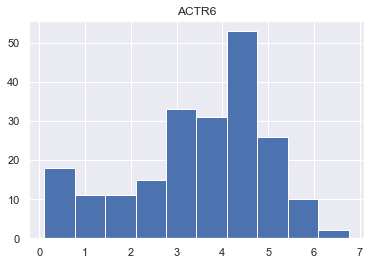

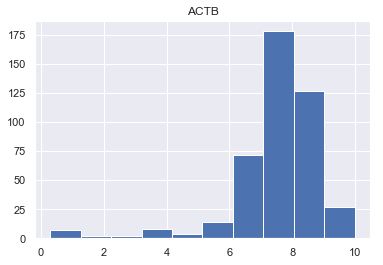

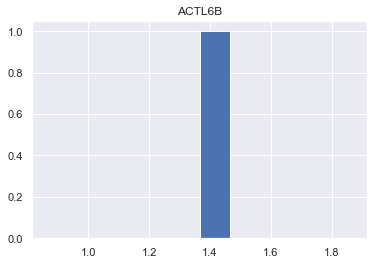

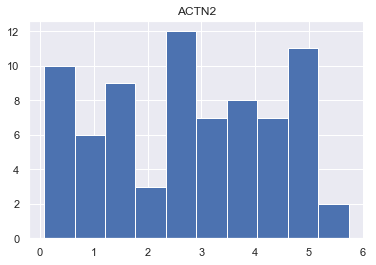

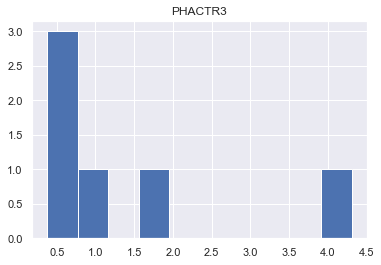

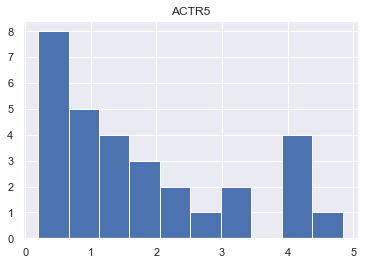

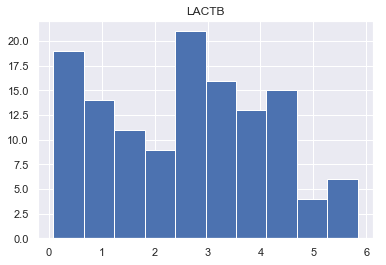

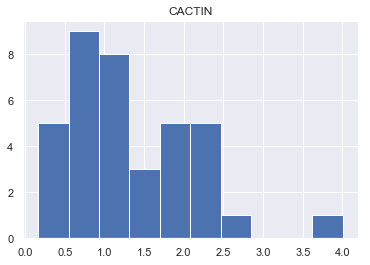

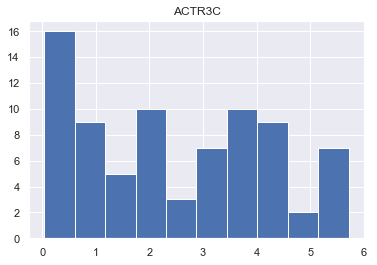

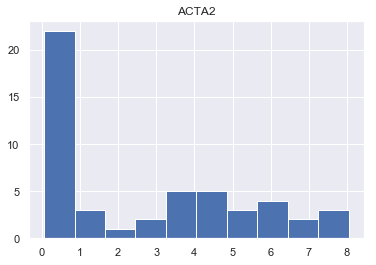

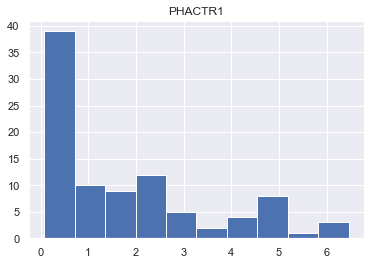

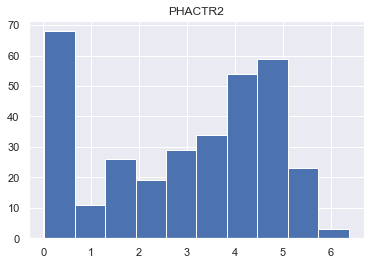

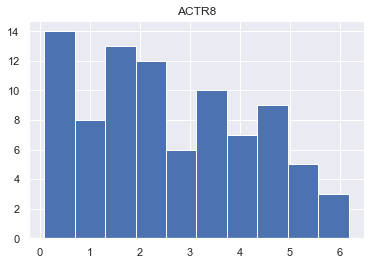

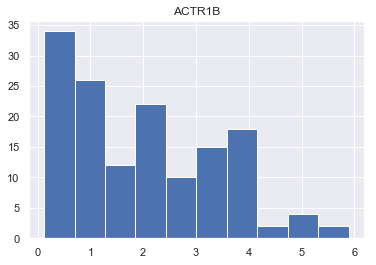

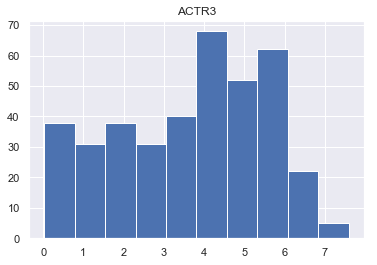

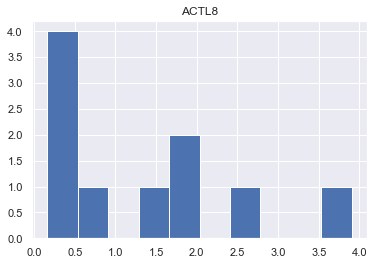

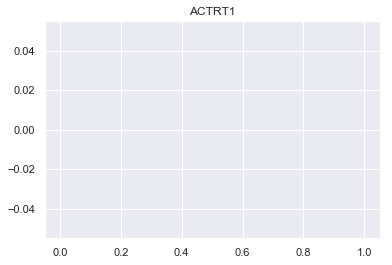

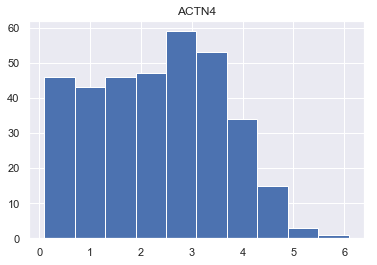

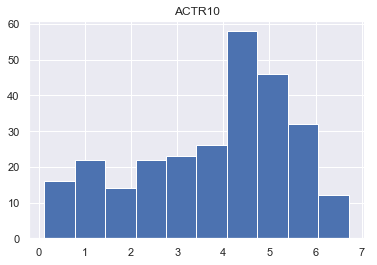

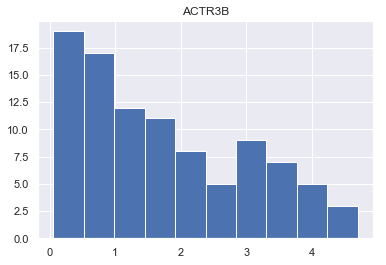

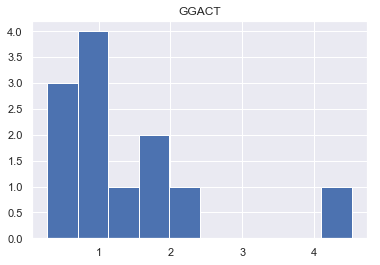

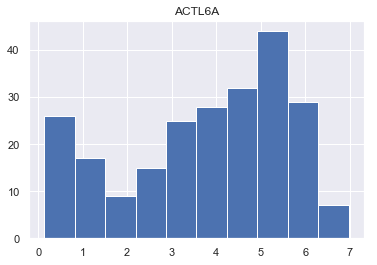

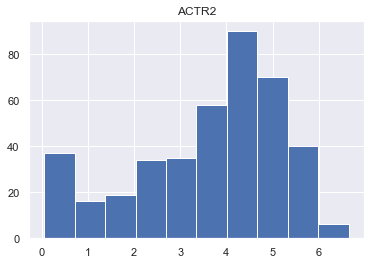

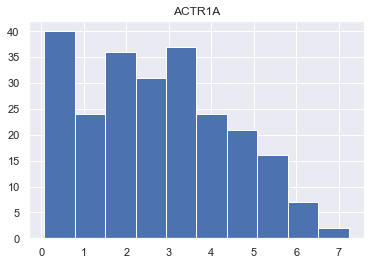

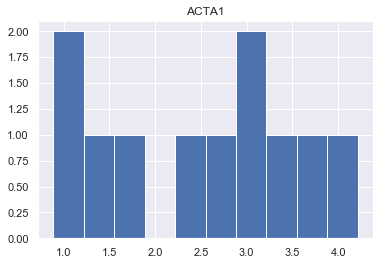

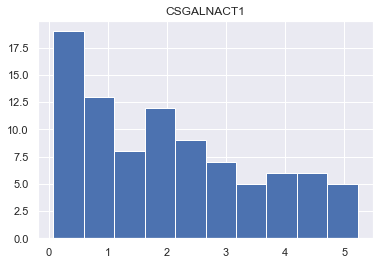

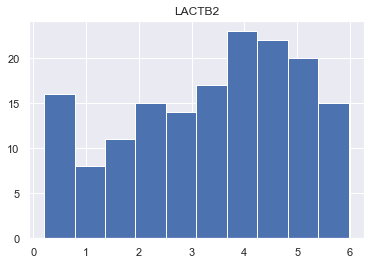

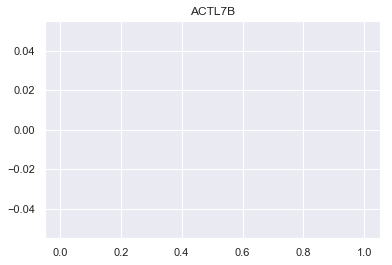

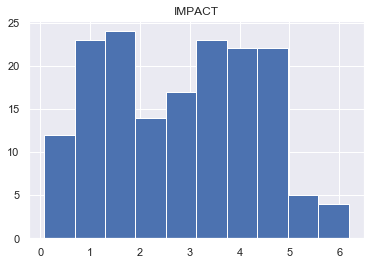

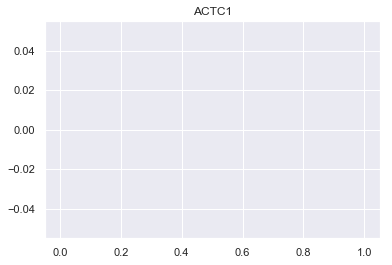

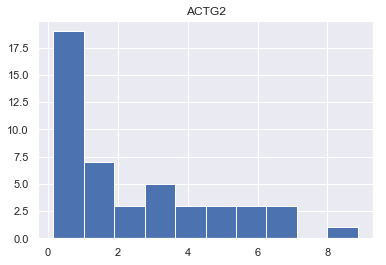

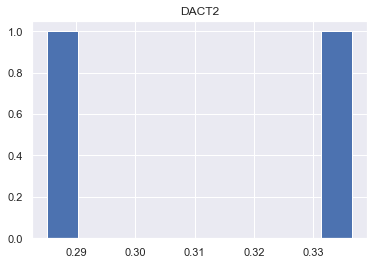

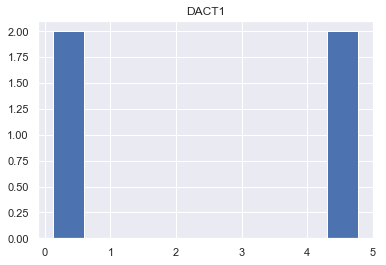

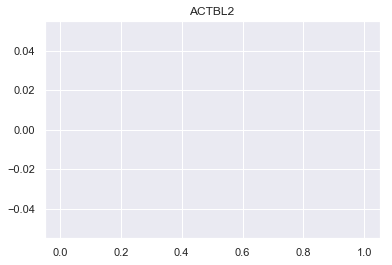

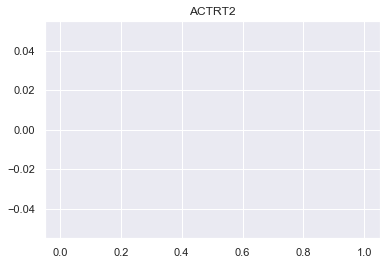

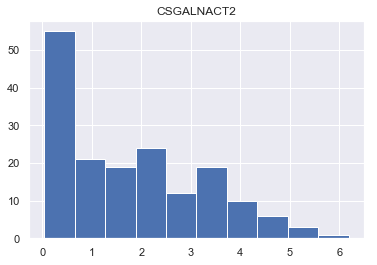

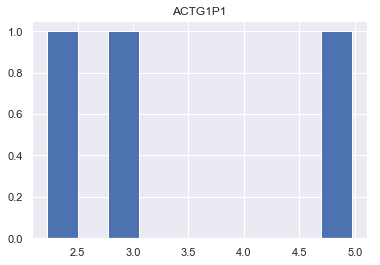

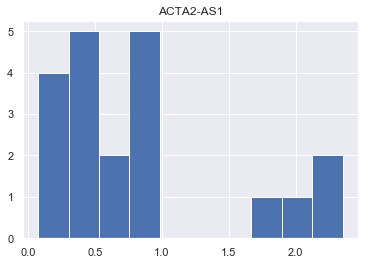

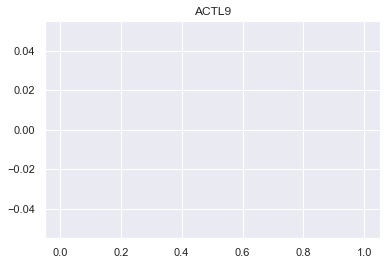

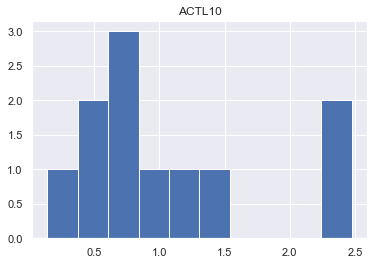

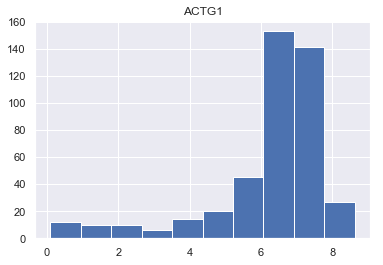

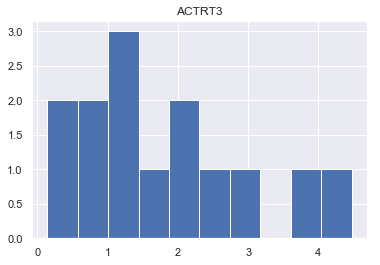

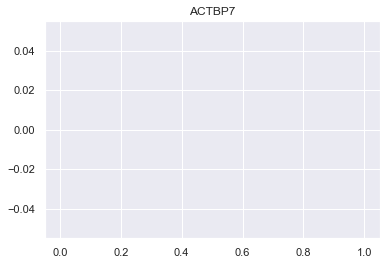

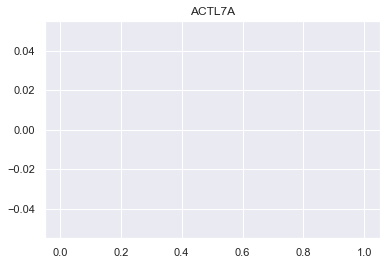

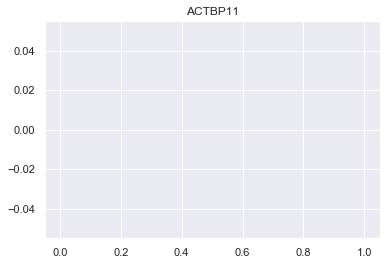

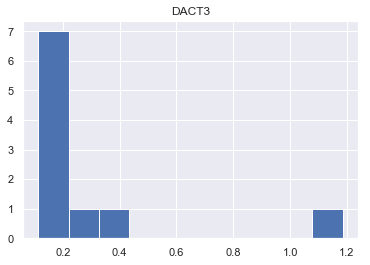

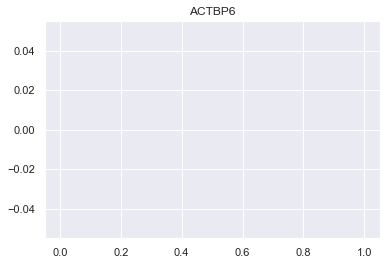

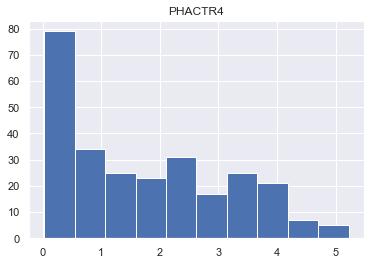

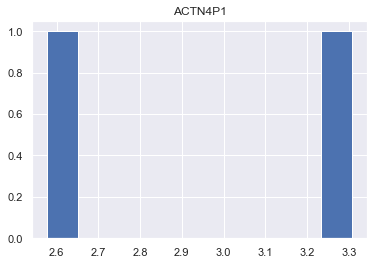

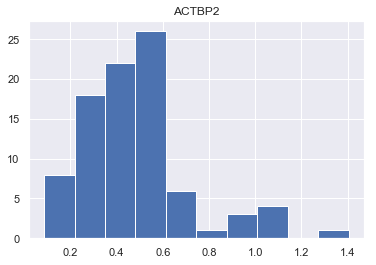

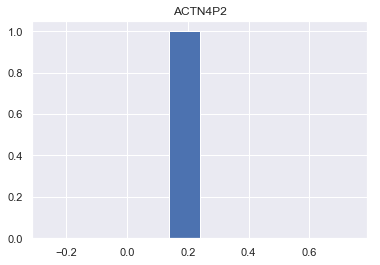

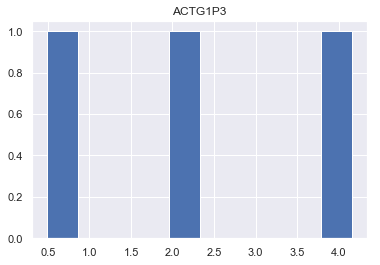

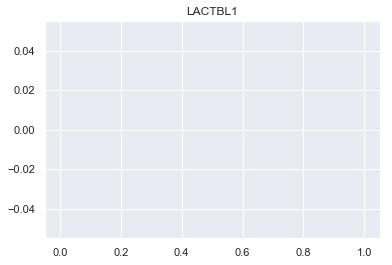

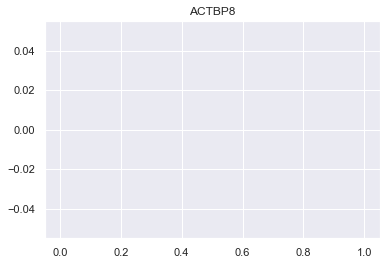

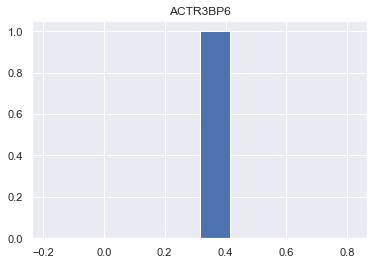

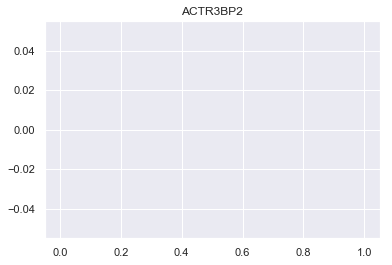

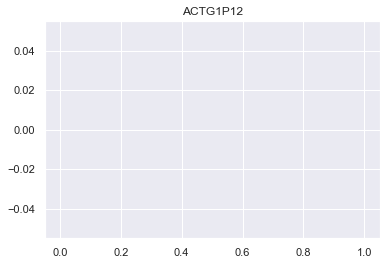

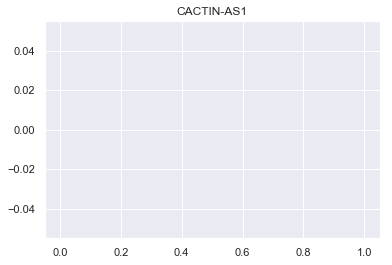

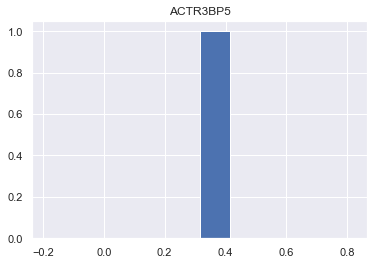

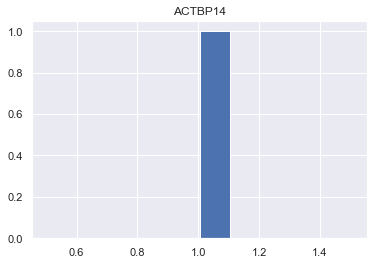

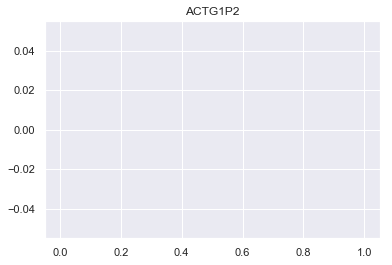

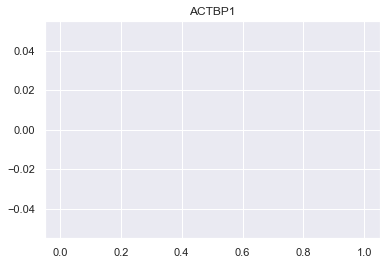

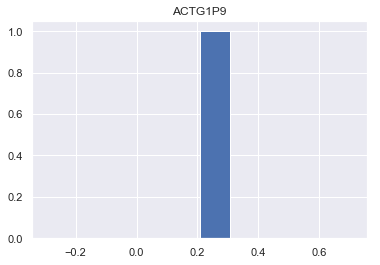

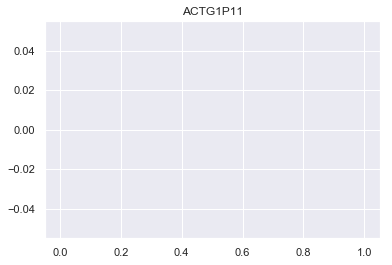

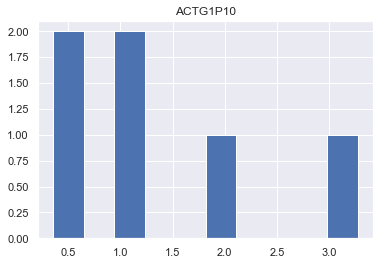

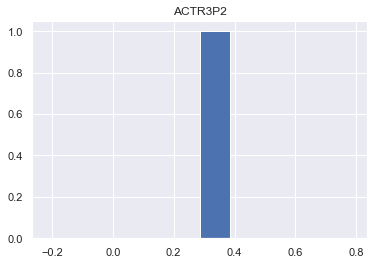

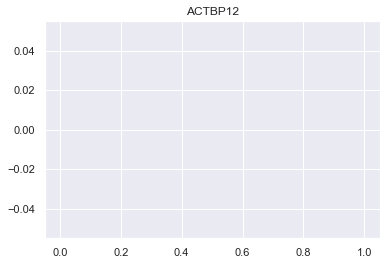

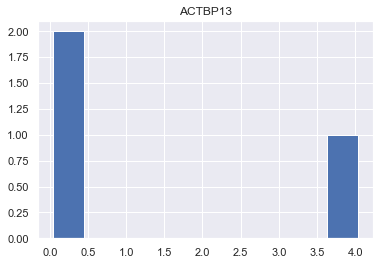

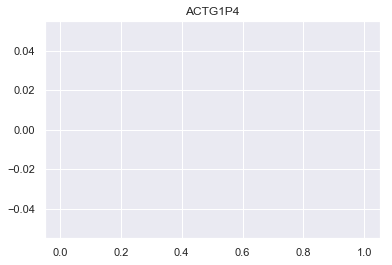

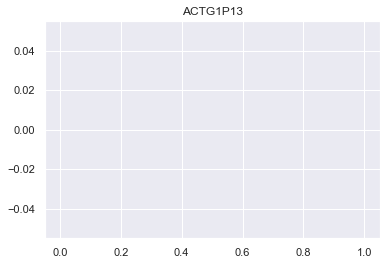

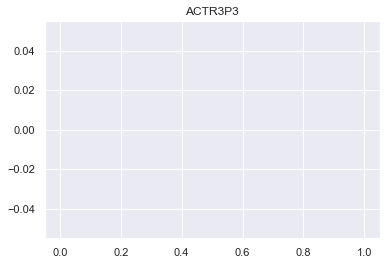

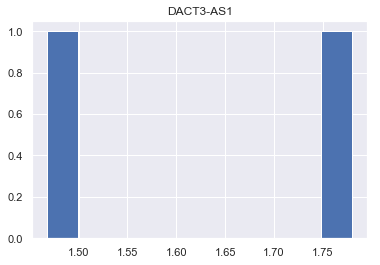

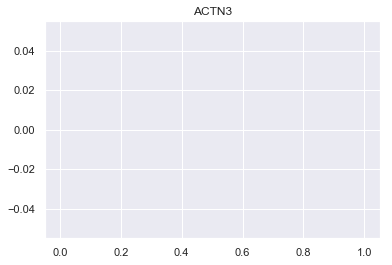

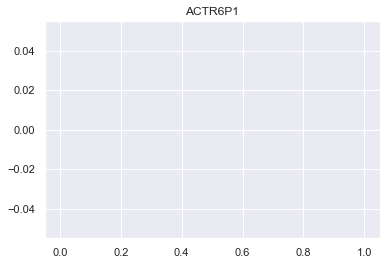

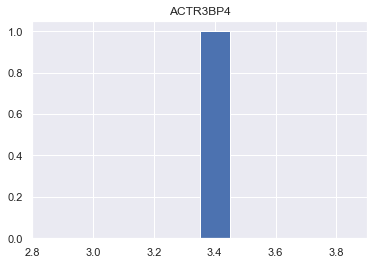

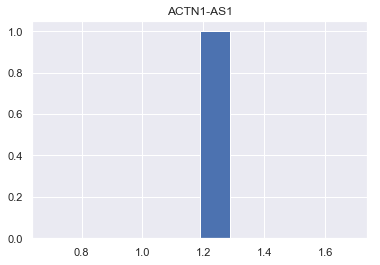

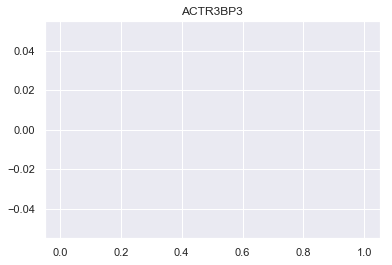

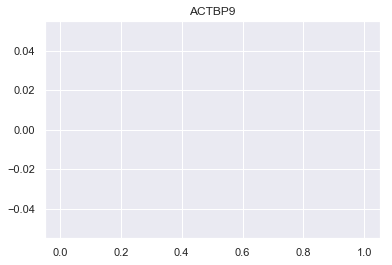

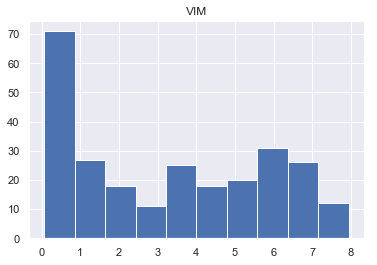

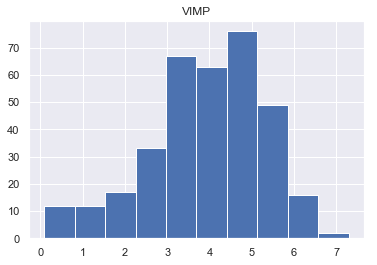

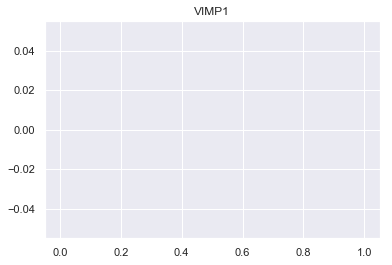

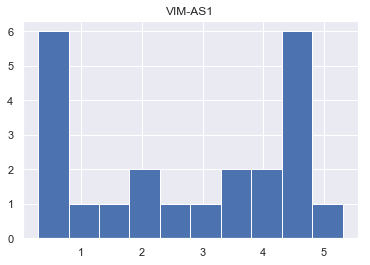

In [35]:
#geneNames
geneList = ['MYH','Myo','Rac','kif','ACTN1','Act','Vim']

for x in geneList:
    for y in data_raw.columns:
        if x.upper() in y.upper():
            #print(y)
            
            indicesToConsider = np.where(data_raw[y]>0)[0]
            #print(indicesToConsider)
            filteredData = data_raw[y][indicesToConsider]
            plt.hist(np.log1p(filteredData))
            plt.title(y)
            plt.savefig(y+'.png')
            plt.show()
